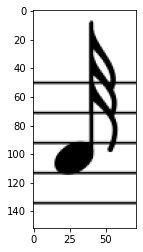

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Activation,MaxPooling2D

DATADIR ="C:/Users/Prathyushaa/Desktop/Project/data/datac"
CATEGORIES = ["A","B","C","D","E","F","G"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break         

In [21]:
print(img_array.shape)

(152, 72)


<function matplotlib.pyplot.show(close=None, block=None)>

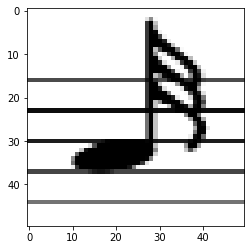

In [22]:
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap= 'gray')
plt.show

In [23]:
training_data= []
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
create_training_data()
            
            

In [24]:
print(len(training_data))

759


In [25]:
random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [26]:
X=pickle.load(open("X.pickle","rb"))
Y=pickle.load(open("Y.pickle","rb"))

In [27]:
X=np.array(X/255.0)
Y=np.array(Y)

In [28]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(7))
model.add(Activation("softmax"))

In [29]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [30]:
history=model.fit(X,Y,epochs=10,validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 1s 72ms/step - loss: 1.9315 - accuracy: 0.2241 - val_loss: 1.8296 - val_accuracy: 0.3092
Epoch 2/10
19/19 [==============================] - 1s 66ms/step - loss: 1.5045 - accuracy: 0.4745 - val_loss: 1.3087 - val_accuracy: 0.5855
Epoch 3/10
19/19 [==============================] - 1s 65ms/step - loss: 0.9601 - accuracy: 0.6722 - val_loss: 0.9877 - val_accuracy: 0.6382
Epoch 4/10
19/19 [==============================] - 1s 65ms/step - loss: 0.5408 - accuracy: 0.8171 - val_loss: 0.6524 - val_accuracy: 0.7105
Epoch 5/10
19/19 [==============================] - 1s 65ms/step - loss: 0.3525 - accuracy: 0.8814 - val_loss: 0.4866 - val_accuracy: 0.8421
Epoch 6/10
19/19 [==============================] - 1s 67ms/step - loss: 0.2030 - accuracy: 0.9539 - val_loss: 0.3358 - val_accuracy: 0.8882
Epoch 7/10
19/19 [==============================] - 1s 68ms/step - loss: 0.1294 - accuracy: 0.9753 - val_loss: 0.3052 - val_accuracy: 0.8816
Epoch 8/10
19

In [31]:
model.save('C:/Users/Prathyushaa/Desktop/CNN.h5')

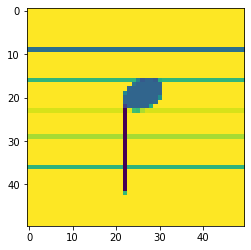

In [32]:
IMG_SIZE=50
CATEGORIES = ["Dha-2","Ni-2","Sa","Re-2","Ga-2","Ma-1","Pa"]
def prepare(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    plt.imshow(new_img)
    plt.show()
    return new_img.reshape(-1,IMG_SIZE,IMG_SIZE,1)

model= tf.keras.models.load_model("C:/Users/Prathyushaa/Desktop/CNN.h5")  
prediction=model.predict([prepare('C:/Users/Prathyushaa/Desktop/c4.jpeg')])

In [33]:
print(CATEGORIES[np.argmax(prediction)])

Sa


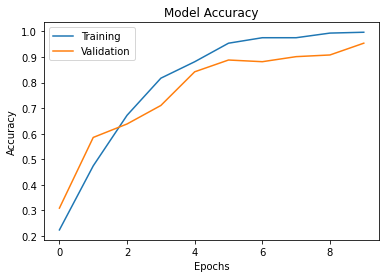

In [34]:
#visualization

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training","Validation"])
plt.show()

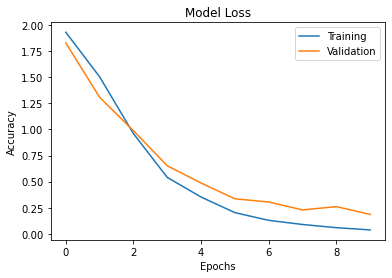

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training", "Validation"])